<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-10-30 13:04:46.511315


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

In [10]:
def us_details():
    population = pop['Population'].sum()
    confirmed = us['confirmed'].sum()
    deaths = us['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('US Confirmed Cases')
    ax1.axis('equal')

    plt.show()

    print('US Population')
    print(pop['Population'].sum())
    print('US Confirmed')
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('US Deaths')
    print(us['deaths'].sum())
    print('')

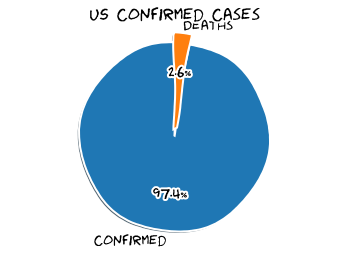

US Population
330362592
US Confirmed
8947862 (2.7084973349525% of population)
US Deaths
228396

New York City Confirmed
261607 (3.137972202100634% of population)
New York City Deaths
23972

Philippines Confirmed
378933
Philippines Deaths
7185



In [11]:
# quick summary
us_details()

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[(ny['admin2'] == 'Queens') | (ny['admin2'] == 'Kings') | (ny['admin2'] == 'New York') | (ny['admin2'] == 'Bronx') | (ny['admin2'] == 'Richmond')]
nyc_confirmed = nyc['confirmed'].sum()
nyc_deaths = nyc['deaths'].sum()
# from https://www.census.gov/quickfacts/newyorkcitynewyork
nyc_population = 8336817

nyc_confirmed_perc_of_pop = (nyc_confirmed/nyc_population) * 100
nyc_deaths_perc_of_confirmed = (nyc_deaths/nyc_confirmed) * 100

print('New York City Confirmed')
print('{0} ({1}% of population)'.format(nyc_confirmed, nyc_confirmed_perc_of_pop))
print('New York City Deaths')
print(nyc_deaths)
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

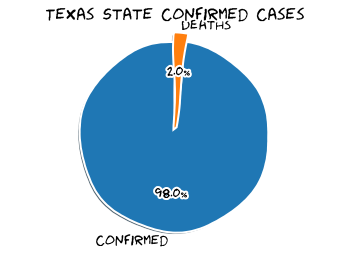

Texas State Total Population
28701845
Texas State Confirmed
918721 (3.2009126939400585% of population)
Texas State Deaths
18276 (1.989287280904649% of confirmed)



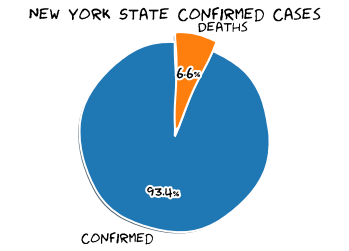

New York State Total Population
19542209
New York State Confirmed
503176 (2.5748163884645794% of population)
New York State Deaths
33427 (6.64320237849182% of confirmed)



In [12]:
state_details('Texas')
state_details('New York')

In [13]:
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1604057086000,40.710881,-73.816847,76980,0,7294,69686,Queens,36081,"Queens, New York, US",3415.476929,None,None,84036081,USA
9,New York,US,1604057086000,40.636182,-73.949356,75517,0,7393,68124,Kings,36047,"Kings, New York, US",2949.994590,None,None,84036047,USA
16,New York,US,1604057086000,40.852093,-73.862828,55527,0,4991,50536,Bronx,36005,"Bronx, New York, US",3915.295863,None,None,84036005,USA
18,New York,US,1604057086000,40.740665,-73.589419,49841,0,2208,47633,Nassau,36059,"Nassau, New York, US",3673.087070,None,None,84036059,USA
19,New York,US,1604057086000,40.883201,-72.801217,49198,0,2019,47179,Suffolk,36103,"Suffolk, New York, US",3331.841168,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,New York,US,1604057086000,43.784416,-75.449040,134,0,0,134,Lewis,36049,"Lewis, New York, US",509.583207,None,None,84036049,USA
2765,New York,US,1604057086000,42.635055,-77.103699,126,0,7,119,Yates,36123,"Yates, New York, US",505.760045,None,None,84036123,USA
2824,New York,US,1604057086000,42.588317,-74.443390,112,0,0,112,Schoharie,36095,"Schoharie, New York, US",361.301977,None,None,84036095,USA
2947,New York,US,1604057086000,44.590409,-74.299260,80,0,0,80,Franklin,36033,"Franklin, New York, US",159.929631,None,None,84036033,USA


In [14]:
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1604057086000,40.710881,-73.816847,76980,0,7294,69686,Queens,36081,"Queens, New York, US",3415.476929,None,None,84036081,USA
9,New York,US,1604057086000,40.636182,-73.949356,75517,0,7393,68124,Kings,36047,"Kings, New York, US",2949.994590,None,None,84036047,USA
16,New York,US,1604057086000,40.852093,-73.862828,55527,0,4991,50536,Bronx,36005,"Bronx, New York, US",3915.295863,None,None,84036005,USA
29,New York,US,1604057086000,40.767273,-73.971526,36224,0,3198,33026,New York,36061,"New York, New York, US",2224.096921,None,None,84036061,USA
99,New York,US,1604057086000,40.585822,-74.148086,17359,0,1096,16263,Richmond,36085,"Richmond, New York, US",3645.753482,None,None,84036085,USA


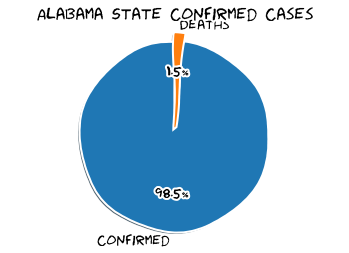

Alabama State Total Population
4887871
Alabama State Confirmed
189149 (3.86976252032838% of population)
Alabama State Deaths
2914 (1.5405844070018875% of confirmed)



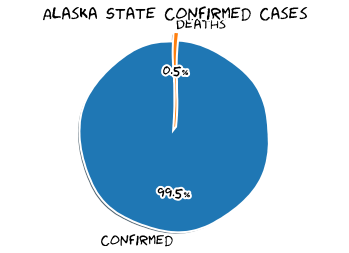

Alaska State Total Population
737438
Alaska State Confirmed
15522 (2.104854916616719% of population)
Alaska State Deaths
77 (0.4960700940600438% of confirmed)



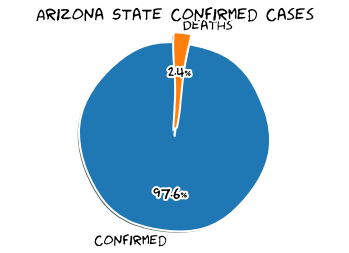

Arizona State Total Population
7171646
Arizona State Confirmed
242480 (3.3810927087031346% of population)
Arizona State Deaths
5917 (2.4402012537116464% of confirmed)



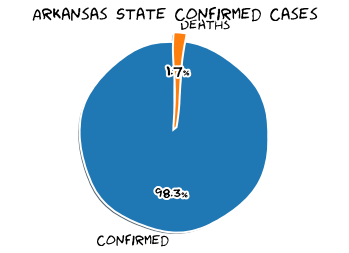

Arkansas State Total Population
3013825
Arkansas State Confirmed
109712 (3.6402909923436164% of population)
Arkansas State Deaths
1894 (1.7263380487093483% of confirmed)



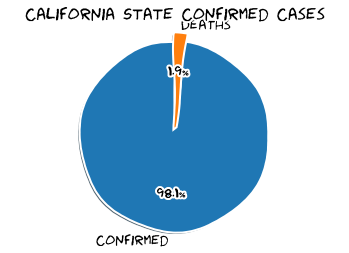

California State Total Population
39557045
California State Confirmed
924323 (2.336683642572391% of population)
California State Deaths
17571 (1.9009588639469104% of confirmed)



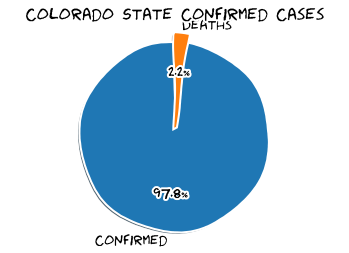

Colorado State Total Population
5695564
Colorado State Confirmed
101991 (1.7907094012111884% of population)
Colorado State Deaths
2268 (2.223725622849075% of confirmed)



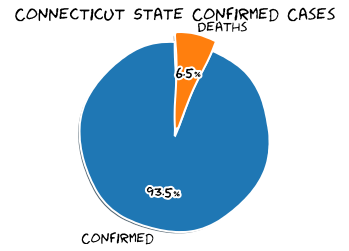

Connecticut State Total Population
3572665
Connecticut State Confirmed
70446 (1.9718053609840274% of population)
Connecticut State Deaths
4609 (6.542600005678108% of confirmed)



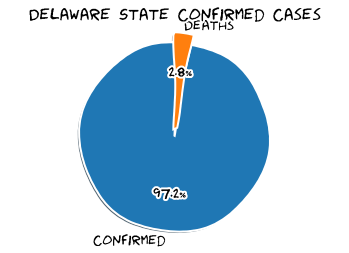

Delaware State Total Population
967171
Delaware State Confirmed
24553 (2.5386410469296536% of population)
Delaware State Deaths
689 (2.8061743982405405% of confirmed)



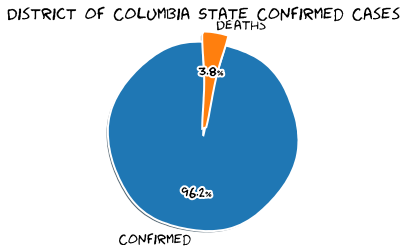

District of Columbia State Total Population
702455
District of Columbia State Confirmed
17074 (2.430618331423365% of population)
District of Columbia State Deaths
645 (3.7776736558510016% of confirmed)



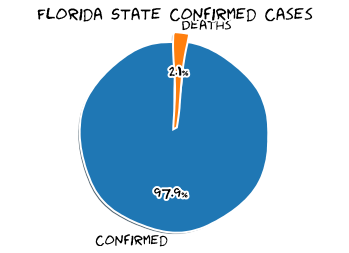

Florida State Total Population
21299325
Florida State Confirmed
794624 (3.7307473358897525% of population)
Florida State Deaths
16648 (2.095078930412371% of confirmed)



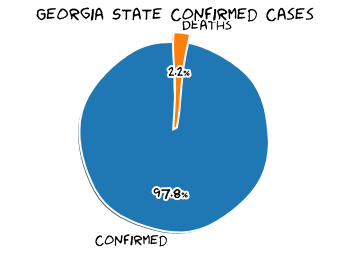

Georgia State Total Population
10519475
Georgia State Confirmed
356848 (3.392260545321891% of population)
Georgia State Deaths
7923 (2.2202730574362195% of confirmed)



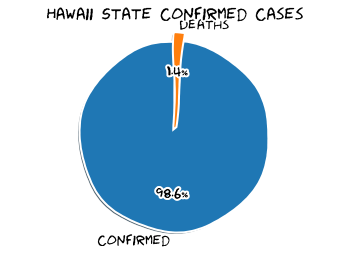

Hawaii State Total Population
1420491
Hawaii State Confirmed
14911 (1.0497074603077388% of population)
Hawaii State Deaths
215 (1.4418885386627323% of confirmed)



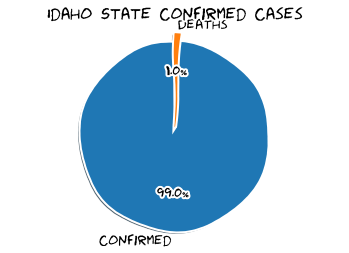

Idaho State Total Population
1754208
Idaho State Confirmed
62746 (3.5768848391980885% of population)
Idaho State Deaths
615 (0.9801421604564434% of confirmed)



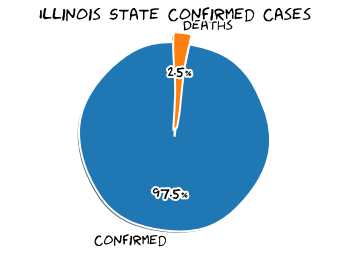

Illinois State Total Population
12741080
Illinois State Confirmed
400159 (3.140699218590575% of population)
Illinois State Deaths
9945 (2.485262108311946% of confirmed)



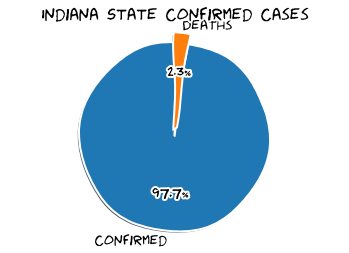

Indiana State Total Population
6691878
Indiana State Confirmed
172730 (2.581188718622784% of population)
Indiana State Deaths
4024 (2.3296474266195797% of confirmed)



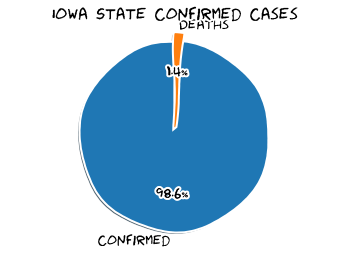

Iowa State Total Population
3156145
Iowa State Confirmed
124170 (3.9342298912122224% of population)
Iowa State Deaths
1705 (1.373117500201337% of confirmed)



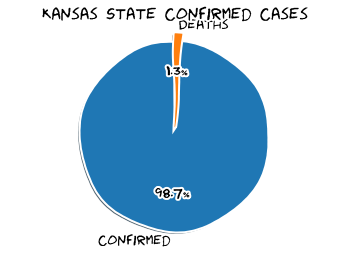

Kansas State Total Population
2911510
Kansas State Confirmed
80136 (2.7523862188349004% of population)
Kansas State Deaths
1008 (1.257861635220126% of confirmed)



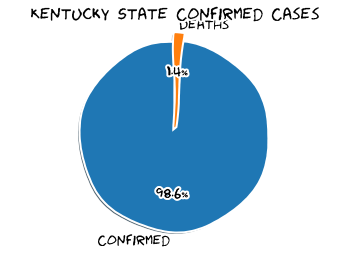

Kentucky State Total Population
4468402
Kentucky State Confirmed
103305 (2.3119003169365695% of population)
Kentucky State Deaths
1461 (1.4142587483664875% of confirmed)



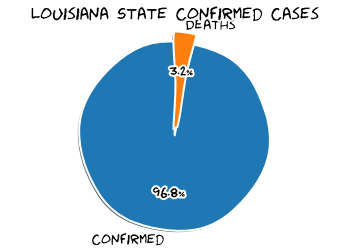

Louisiana State Total Population
4659978
Louisiana State Confirmed
181837 (3.9020999669955523% of population)
Louisiana State Deaths
5908 (3.249063721904783% of confirmed)



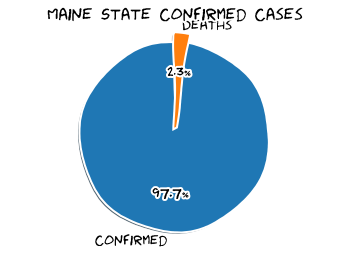

Maine State Total Population
1338404
Maine State Confirmed
6466 (0.48311272231702834% of population)
Maine State Deaths
146 (2.257964738632849% of confirmed)



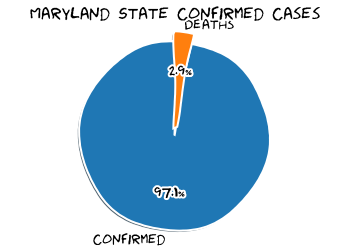

Maryland State Total Population
6042718
Maryland State Confirmed
143387 (2.3728891535232983% of population)
Maryland State Deaths
4112 (2.8677634653071755% of confirmed)



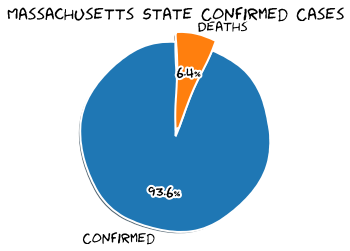

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
155564 (2.253848765073023% of population)
Massachusetts State Deaths
9951 (6.396724177830346% of confirmed)



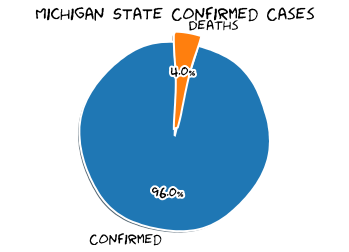

Michigan State Total Population
9995915
Michigan State Confirmed
190043 (1.90120664291363% of population)
Michigan State Deaths
7653 (4.026983366922223% of confirmed)



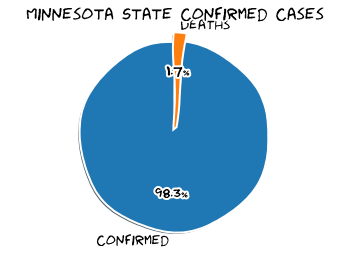

Minnesota State Total Population
5611179
Minnesota State Confirmed
142311 (2.5362049579954586% of population)
Minnesota State Deaths
2472 (1.7370407066214135% of confirmed)



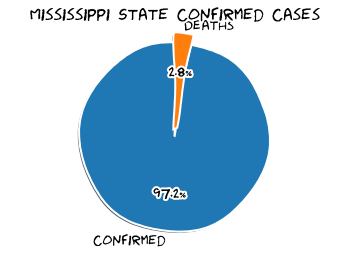

Mississippi State Total Population
2986530
Mississippi State Confirmed
118587 (3.9707285712850697% of population)
Mississippi State Deaths
3310 (2.7911997099176133% of confirmed)



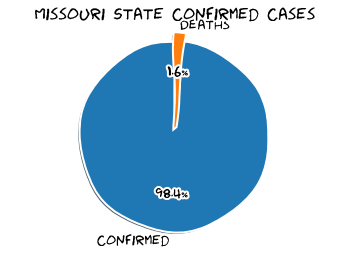

Missouri State Total Population
6126452
Missouri State Confirmed
177707 (2.900651143598285% of population)
Missouri State Deaths
2891 (1.6268351837575337% of confirmed)



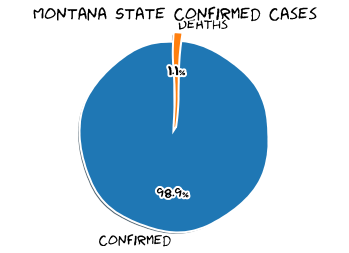

Montana State Total Population
1062305
Montana State Confirmed
30853 (2.9043447973981107% of population)
Montana State Deaths
337 (1.092276277833598% of confirmed)



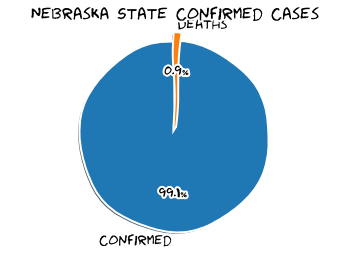

Nebraska State Total Population
1929268
Nebraska State Confirmed
68150 (3.5324278430990406% of population)
Nebraska State Deaths
637 (0.9347028613352898% of confirmed)



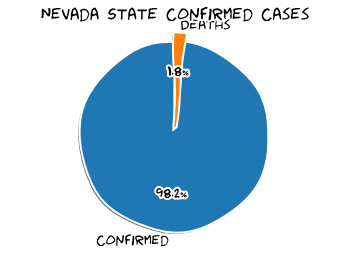

Nevada State Total Population
3034392
Nevada State Confirmed
98552 (3.247833503383874% of population)
Nevada State Deaths
1765 (1.7909327055767514% of confirmed)



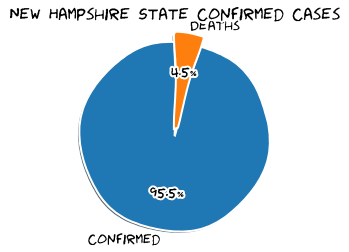

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
10768 (0.7938321717296075% of population)
New Hampshire State Deaths
482 (4.476225854383358% of confirmed)



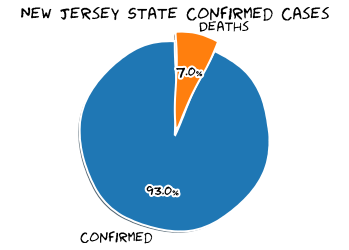

New Jersey State Total Population
8908520
New Jersey State Confirmed
234547 (2.632839124792895% of population)
New Jersey State Deaths
16332 (6.963209932337655% of confirmed)



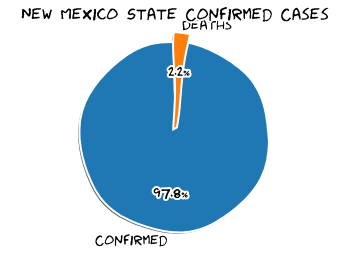

New Mexico State Total Population
2095428
New Mexico State Confirmed
44904 (2.142951225238949% of population)
New Mexico State Deaths
994 (2.2136112595759845% of confirmed)



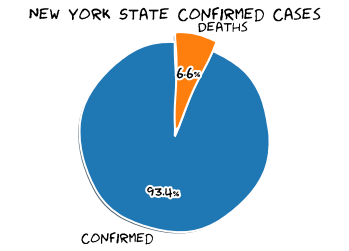

New York State Total Population
19542209
New York State Confirmed
503176 (2.5748163884645794% of population)
New York State Deaths
33427 (6.64320237849182% of confirmed)



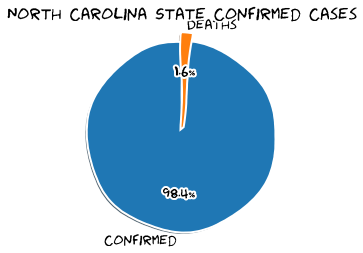

North Carolina State Total Population
10383620
North Carolina State Confirmed
269021 (2.5908209275763174% of population)
North Carolina State Deaths
4283 (1.5920690206340768% of confirmed)



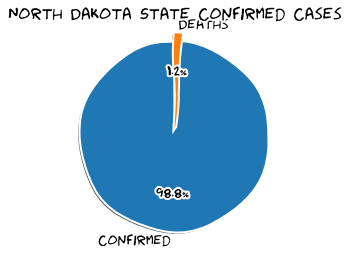

North Dakota State Total Population
760077
North Dakota State Confirmed
41130 (5.411293855754088% of population)
North Dakota State Deaths
499 (1.213226355458303% of confirmed)



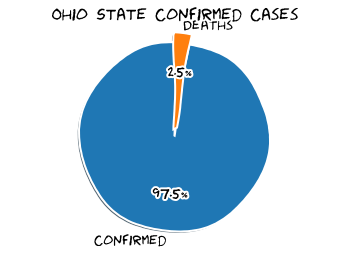

Ohio State Total Population
11689442
Ohio State Confirmed
208937 (1.7873992616585122% of population)
Ohio State Deaths
5275 (2.524684474267363% of confirmed)



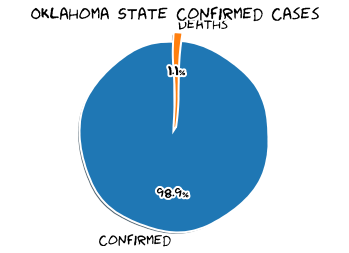

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
120193 (3.0482016718407112% of population)
Oklahoma State Deaths
1306 (1.0865857412661302% of confirmed)



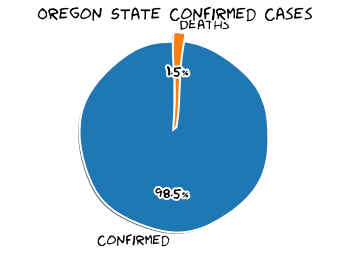

Oregon State Total Population
4190713
Oregon State Confirmed
43793 (1.045001172831449% of population)
Oregon State Deaths
673 (1.5367752837211428% of confirmed)



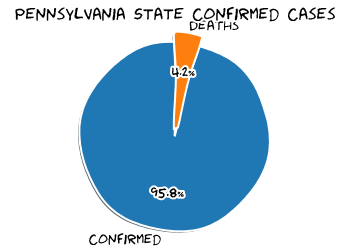

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
208087 (1.6247835178409407% of population)
Pennsylvania State Deaths
8743 (4.201607981277062% of confirmed)



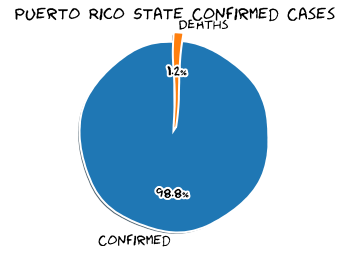

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
65743 (2.057585348808023% of population)
Puerto Rico State Deaths
820 (1.247281079354456% of confirmed)



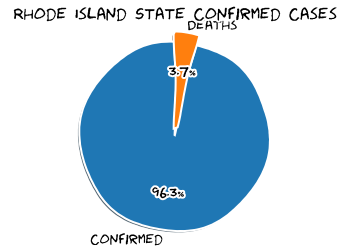

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
32312 (3.0560429011221824% of population)
Rhode Island State Deaths
1195 (3.698316414954197% of confirmed)



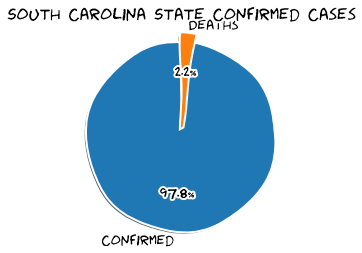

South Carolina State Total Population
5084127
South Carolina State Confirmed
174591 (3.434040888435714% of population)
South Carolina State Deaths
3889 (2.2274916805562714% of confirmed)



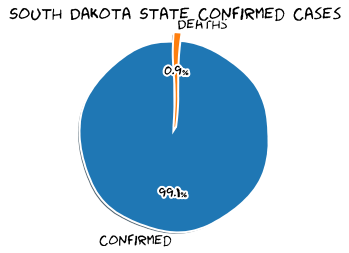

South Dakota State Total Population
882235
South Dakota State Confirmed
43000 (4.873984822637959% of population)
South Dakota State Deaths
403 (0.9372093023255814% of confirmed)



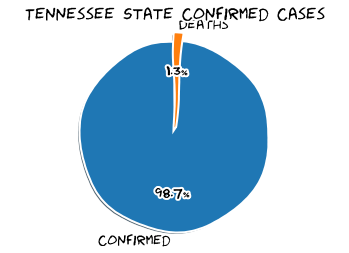

Tennessee State Total Population
6770010
Tennessee State Confirmed
256880 (3.7943813967778484% of population)
Tennessee State Deaths
3263 (1.2702429149797572% of confirmed)



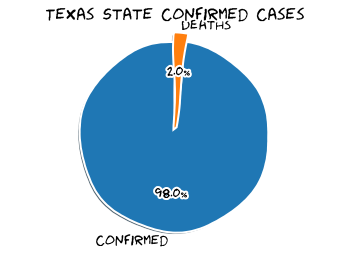

Texas State Total Population
28701845
Texas State Confirmed
918721 (3.2009126939400585% of population)
Texas State Deaths
18276 (1.989287280904649% of confirmed)



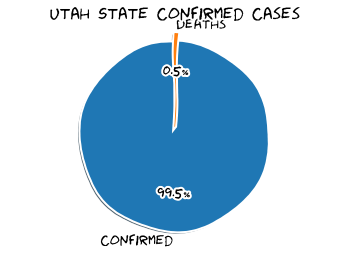

Utah State Total Population
3161105
Utah State Confirmed
110640 (3.5000419157225084% of population)
Utah State Deaths
598 (0.5404916847433117% of confirmed)



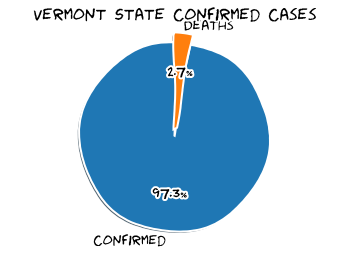

Vermont State Total Population
626299
Vermont State Confirmed
2141 (0.34184949999920167% of population)
Vermont State Deaths
58 (2.70901447921532% of confirmed)



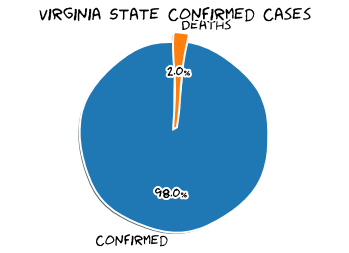

Virginia State Total Population
8517685
Virginia State Confirmed
178183 (2.0919181679059506% of population)
Virginia State Deaths
3636 (2.0405987103146765% of confirmed)



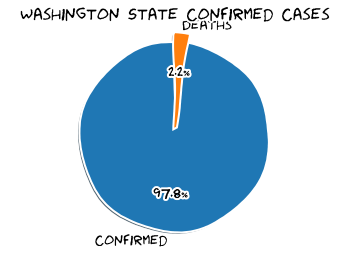

Washington State Total Population
7535591
Washington State Confirmed
105557 (1.4007793151194115% of population)
Washington State Deaths
2359 (2.2348115236317816% of confirmed)



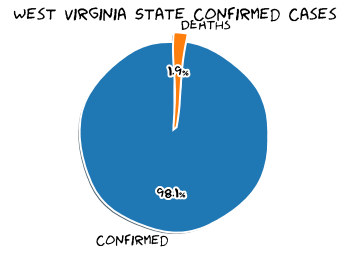

West Virginia State Total Population
1805832
West Virginia State Confirmed
23466 (1.2994564278404637% of population)
West Virginia State Deaths
445 (1.8963606920651153% of confirmed)



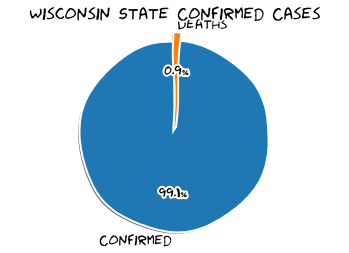

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
214995 (3.698159202747779% of population)
Wisconsin State Deaths
1948 (0.9060675829670458% of confirmed)



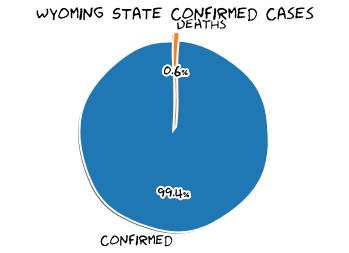

Wyoming State Total Population
577737
Wyoming State Confirmed
12507 (2.164825863671532% of population)
Wyoming State Deaths
77 (0.6156552330694811% of confirmed)



In [15]:
for i in states:
    state_details(i)

In [16]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 45148790},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 1182908},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-10-30T12:24:52.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 30360062},
 'source': 'https://github.com/mathdroid/covid19'}

In [17]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [18]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,,,,Afghanistan,2020-10-30 04:24:49,33.93911,67.709953,41268,1532,34239,5497,Afghanistan,106.01016878679728,3.7123194727149365
1,,,,Albania,2020-10-30 04:24:49,41.1533,20.1683,20315,499,11007,8809,Albania,705.9211897977623,2.4563130691607187
2,,,,Algeria,2020-10-30 04:24:49,28.0339,1.6596,57332,1949,39635,15748,Algeria,130.74261426347374,3.399497662736343
3,,,,Andorra,2020-10-30 04:24:49,42.5063,1.5218,4567,73,3260,1234,Andorra,5910.8263767553235,1.5984234727392161
4,,,,Angola,2020-10-30 04:24:49,-11.2027,17.8739,10269,275,3736,6258,Angola,31.244800900424714,2.677962800662187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,,,,West Bank and Gaza,2020-10-30 04:24:49,31.9522,35.2332,52571,473,45448,6650,West Bank and Gaza,1030.5178013320224,0.8997355956706169
3955,,,,Western Sahara,2020-10-30 04:24:49,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3956,,,,Yemen,2020-10-30 04:24:49,15.552727,48.516388,2062,599,1366,97,Yemen,6.913438651848616,29.049466537342386
3957,,,,Zambia,2020-10-30 04:24:49,-13.133897,27.849332,16325,348,15585,392,Zambia,88.80025604935085,2.131699846860643


In [19]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,California,US,1604057086000,34.308284,-118.228241,305125,0,7044,298081,Los Angeles,06037,"Los Angeles, California, US",3039.363959,None,None,84006037,USA
1,Florida,US,1604057086000,25.611236,-80.551706,184669,0,3634,181035,Miami-Dade,12086,"Miami-Dade, Florida, US",6796.948037,None,None,84012086,USA
2,Illinois,US,1604057086000,41.841448,-87.816588,183649,0,5463,178186,Cook,17031,"Cook, Illinois, US",3565.838672,None,None,84017031,USA
3,Texas,US,1604057086000,29.858649,-95.393395,160984,0,2800,158184,Harris,48201,"Harris, Texas, US",3415.508160,None,None,84048201,USA
4,Arizona,US,1604057086000,33.348359,-112.491815,156736,0,3566,153170,Maricopa,04013,"Maricopa, Arizona, US",3494.348571,None,None,84004013,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,Illinois,US,1604057086000,NaN,NaN,1,0,0,1,Out of IL,80017,"Out of IL, Illinois, US",NaN,None,None,84080017,USA
3231,New Mexico,US,1604057086000,35.857516,-103.822094,1,0,0,1,Harding,35021,"Harding, New Mexico, US",160.000000,None,None,84035021,USA
3232,North Carolina,US,1604057086000,NaN,NaN,1,0,0,1,Unassigned,90037,"Unassigned, North Carolina, US",NaN,None,None,84090037,USA
3233,Oregon,US,1604057086000,44.726982,-120.028143,1,0,0,1,Wheeler,41069,"Wheeler, Oregon, US",75.075075,None,None,84041069,USA


In [20]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
8,New York,US,1604057086000,40.710881,-73.816847,76980,0,7294,69686,Queens,36081,"Queens, New York, US",3415.476929,None,None,84036081,USA
9,New York,US,1604057086000,40.636182,-73.949356,75517,0,7393,68124,Kings,36047,"Kings, New York, US",2949.994590,None,None,84036047,USA
16,New York,US,1604057086000,40.852093,-73.862828,55527,0,4991,50536,Bronx,36005,"Bronx, New York, US",3915.295863,None,None,84036005,USA
18,New York,US,1604057086000,40.740665,-73.589419,49841,0,2208,47633,Nassau,36059,"Nassau, New York, US",3673.087070,None,None,84036059,USA
19,New York,US,1604057086000,40.883201,-72.801217,49198,0,2019,47179,Suffolk,36103,"Suffolk, New York, US",3331.841168,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2743,New York,US,1604057086000,43.784416,-75.449040,134,0,0,134,Lewis,36049,"Lewis, New York, US",509.583207,None,None,84036049,USA
2765,New York,US,1604057086000,42.635055,-77.103699,126,0,7,119,Yates,36123,"Yates, New York, US",505.760045,None,None,84036123,USA
2824,New York,US,1604057086000,42.588317,-74.443390,112,0,0,112,Schoharie,36095,"Schoharie, New York, US",361.301977,None,None,84036095,USA
2947,New York,US,1604057086000,44.590409,-74.299260,80,0,0,80,Franklin,36033,"Franklin, New York, US",159.929631,None,None,84036033,USA


In [21]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

503176

In [22]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3


In [23]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
18,None,Philippines,1604060692000,12.879721,121.774017,378933,330457,7185,41291.0,None,None,Philippines,345.801467,None,None,608,PHL,PH


In [24]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
